# Titanic Survival Exploration with Decision Trees

## 1. Introduction
This is a short example of how to apply decision trees to a subset of the widely known dataset of Titanic survivors. The goal is to predict whether an individual survived the disaster based on characteristics like:
- gender, age, ticket fare, cabin, etc.

We will keep it simple and focus on the application of the `DecisionTreeClassifier` from sklearn (or scikit-learn) library. Note that we skip some steps which would also be an integral part of a data analysis, e.g. 
- explorary data analysis (EDA), 
- feature engineering, 
- comparison of classifiers, 
- model inferences like feature importances, etc. 

The respective link on the class of the classifier can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and there are more information in this [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


First, we'll have to import all of our favourite libraries and the respective classifier we want to use. As aforementioned, we'll use the `DecisionTreeClassifier()` for now.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd

# Immport visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

# Inline plotting
%matplotlib inline 

# Sklearn function to split data into train and test data 
from sklearn.model_selection import train_test_split

# Import classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Setting a seed
import random
random.seed(42)

## 2. Data
Import data from csv file.

In [2]:
# Load the dataset
file = "data/data_titanic.csv"
full_data = pd.read_csv(file)

# Print head
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape
print("Individuals in dataset: ", full_data.shape[0])
print("Variables: ", full_data.shape[1])

# Descriptive stats
full_data.describe()

Individuals in dataset:  891
Variables:  12


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


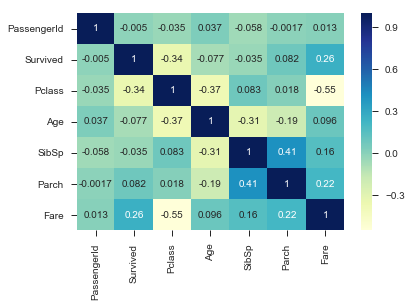

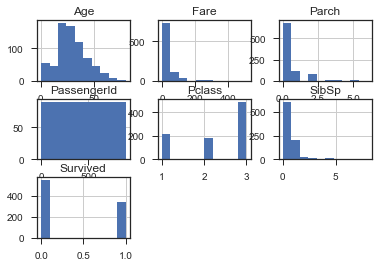

In [4]:
# Create heatmap of correlations
sns.heatmap(full_data.corr(), annot= True, cmap = "YlGnBu");

# Histogram
full_data.hist();

#### Notes
Highest correlations with outcome variable `Survived`:
- `Pclass` 
- `Fare`

In a next step, we'll check for missing data and split the data into outcome vector y (dependent variable) and feature matrix X (independent variables) to feed our algorithm.

In [5]:
# Check for missing data
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Some data points for the variables `Age` and `Cabin` are missing which we have to deal with in a next step.

In [6]:
# Split data into y and X. 
outcomes = full_data["Survived"]
features_raw = full_data.drop("Survived", axis="columns")

# First five observations of features
features_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# First five outcomes (survived: 1)
outcomes.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Preprocessing
Apply one-hot encoding (dummy variables) to categorical features, namely `Cabin` and `Embarked` using the [get_dummies](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function of the pandas library. In additon, we'll fill all NAs with zeros. Other imputation methods may be prefered for performance reasons but require a more in-depth study of underlying characteristics of missing data.

In [8]:
# Encode the features using dummy variables
features = pd.get_dummies(features_raw)

# fill NAs with zeros
features = features.fillna(0.0)

## 3. Modeling
Next step is to split the data into training and testing data, initilize one instance of the classifier and fit this instance to our dataset.

1. Split the data into training and testing sets
2. Train the model on the training set.

For now, we will not change any hyperparameters of the model and see what happens.

In [9]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size = 0.2, random_state=42)

# Initialize instance of classifier
model = DecisionTreeClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Testing the model
Calculate accuracy over training and testing set.

In [10]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy is: ", train_accuracy)
print("Test accuracy is: ", round(test_accuracy,4))

Training accuracy is:  1.0
Test accuracy is:  0.8101


#### First results
Model without modifications: Perfect training accuracy and lower testing accuracy. Seems as if we are heavily overfitting here. The model simply "remembers" the outcomes. Hence, the accuracy on unseen data (test data) is significantly lower. Poor generalizability of the model which we'd like to improve.  

We improve the generalizability by training a new model and specify some hyperparameters to improve the testing accuracy. More on the [hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. For now, we will manually change the following parameters:

- "max_depth": Depth of decision tree
- "min_samples_leaf": Minimum number of samples required to be at a leaf node.
- "min_samples_split": Minimum number of samples required to split an internal node

In general, more sophisticated methods to find good hyperparameters ought to be used. For example grid search or randomized search over a list of hyperparameters. 

In [11]:
# Initialize instance as model2 with specified hyperparameters
model2 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf= 6, min_samples_split= 10)

# Fit the model to the data
model2.fit(X_train, y_train)

# Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Compare predictions and outcomes
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)

print("Accuracy on training data: " + str(round(train_accuracy,4)*100)+ "%" ) 
print("Accuracy on test data: " +  str(round(test_accuracy, 4)*100)+ "%" )

Accuracy on training data: 87.08%
Accuracy on test data: 85.47%


## 4. Feature Importances

In [12]:
# Feature names
feature_names = features.columns[:features.shape[1]]

# Get importances
importances = model2.feature_importances_

# Sort by importances (descending order)
indices = np.argsort(-importances)

# Collect feature names and importances as dict
dict(zip(feature_names[indices][:5], importances[indices][:5]))

{'Sex_female': 0.5010429602710863,
 'Pclass': 0.1699245178431399,
 'Fare': 0.11925938443321532,
 'SibSp': 0.06439584528529795,
 'PassengerId': 0.06337000024611071}

## 5. Summary, Conclusion and Next Steps
Based on the preliminary results of the decision tree classifier our accuracy on the test data set is roughly over 85%, which is a decent start. We could probably increase this even further using feature engineering and hyperparameter tuning. However, the main goal of this notebook was to show how to apply the classifier on a simple dataset. 

Moreover, we extracted the relative importance of the features. Accordingly, the three variables with most explanatory power were:
- Gender (`Sex_male`)
- Passenger class (`Pclass`)
- `Fare`

In [13]:
print("Notebook completed")

Notebook completed
